In [1]:
import pandas as pd
from pandas import Series
import numpy as np
import requests
import csv
import matplotlib.pyplot as plt
import warnings
from matplotlib import dates
import matplotlib as mlp
from mpl_finance import candlestick_ohlc
%matplotlib inline          

ModuleNotFoundError: No module named 'mpl_finance'

# Task 1: Choose one or more suitable web API(s)

**API Selected:**

> -  A single API that was chosen for the assignment was that provided by https://www.quandl.com/
> -  Specifically, the data related to stock prices, dividends and splits API - https://www.quandl.com/databases/WIKIP
> -  The particular API is freely available upon signing up.
> -  The API key required for the extration of data  is ***qPPFXCRW6twydcQXVB2i***

In [2]:
apikey = "qPPFXCRW6twydcQXVB2i"       #API KEY retrieved on Signup

# Task 2: Retrieve data from the chosen API

**Collecting Raw Data:**

The below function *get_raw_data()* uses the API to retrieve the **stocks data** of the companies that are passed as an argument.


In [3]:
#Function to request data from the url provided using the 'companies' argument and the global variable 'apikey' 
def get_raw_data(companies):
    url = "https://www.quandl.com/api/v3/datatables/WIKI/PRICES.csv?ticker="+companies["Alphabet"]+"&&api_key="+apikey
    get_response = requests.get(url) #Requests to get data from url
    if get_response.status_code != 200: #Retrieval Error Response
        print("Unable to retrive data",get_response.status_code)
    else:
        print("Data Retrieved & Status Code:",get_response.status_code)
        data = csv.reader(get_response.text.strip().split('\n')) #Splits the data on the basis of newline and stores the result
        return data

# Task 3: Parsing of collected raw data, and Storing it in a File

***Writing raw data to CSV:***

> - The code below retreives the raw data utilizing the above Function from the API and writes it to a CSV file.
> - The data collected here requires *pre-processing* and *quality checking* before it can be used.

In [ ]:
##Variables to get the Raw Data from the API and Store in the File
companies = {"Alphabet":"GOOG","Microsoft":"MSFT","Apple":"AAPL"} #Dictionary of companies created for better understanding of code
store_data = get_raw_data(companies) #Calling the function and storing the value(list) 
with open('Raw_data.csv','w',newline='')as rawfile: #Creating a CSV File 
            w = csv.writer(rawfile)
            for rows in store_data: #Iterating over the retrieved List of CSV data
                w.writerow(rows) #Writing each row in the Raw_data.csv file created
            rawfile.close()
print('Raw File Saved')

# Task 4: Load and Represent the data using Pandas DataFrame.
## Apply pre-processing steps to clean and filter the data.

***Parsing Raw Data:***

> - The raw data returns approx. 1000 lines of values, consisting stock data of a company Alphabet(GOOG)
> - Selection of appropriate columns is needed.

In [4]:
collected_data = pd.read_csv('Raw_data.csv') #Loading the CSV File using Pandas DataFrame
collected_data.head() #Preview of the Dataset

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,GOOG,2014-03-27,568.000,568.00,552.92,558.46,13100.0,0.0,1.0,568.000,568.00,552.92,558.46,13100.0
1,GOOG,2014-03-28,561.200,566.43,558.67,559.99,41100.0,0.0,1.0,561.200,566.43,558.67,559.99,41100.0
2,GOOG,2014-03-31,566.890,567.00,556.93,556.97,10800.0,0.0,1.0,566.890,567.00,556.93,556.97,10800.0
3,GOOG,2014-04-01,558.710,568.45,558.71,567.16,7900.0,0.0,1.0,558.710,568.45,558.71,567.16,7900.0
4,GOOG,2014-04-02,565.106,604.83,562.19,567.00,146700.0,0.0,1.0,565.106,604.83,562.19,567.00,146700.0


### Using the Pandas Library for additional Data Modification

> - Above is the preview of the dataset (First Five Records).
> - 8 columns are chosen for analysis, namely ***ticker, date, open, high, low, close, volume*** and ***adj_low*** for each day
> - The **date** field is converted to a DateTime to allow for time analysis.


In [5]:
#Converting date field to DateTime
collected_data['date'] = pd.to_datetime(collected_data['date'])
#Selecting on the desired columns for Analysis
selected_data = collected_data.loc[:,['ticker','date','open','high','low','close','volume','adj_close']]
#Extracting/Filtering data from the year 2016 and untill now (last date 16-March-2018)
#Adding a column Year, extracting the year from Date column
selected_data['Year'] = selected_data['date'].apply(lambda x:x.strftime('%Y'))
#Renaming the column name ticker to Company
selected_data = selected_data.rename(columns={'ticker':'Company'})
#Previewing the First 5 Records
selected_data.head() 

,Company,date,open,high,low,close,volume,adj_close,Year
0,GOOG,2014-03-27,568.000,568.00,552.92,558.46,13100.0,558.46,2014
1,GOOG,2014-03-28,561.200,566.43,558.67,559.99,41100.0,559.99,2014
2,GOOG,2014-03-31,566.890,567.00,556.93,556.97,10800.0,556.97,2014
3,GOOG,2014-04-01,558.710,568.45,558.71,567.16,7900.0,567.16,2014
4,GOOG,2014-04-02,565.106,604.83,562.19,567.00,146700.0,567.00,2014


#### Working on Missing Data 

> - Next step is to look for **missing data** to see if further pre-processing is needed.

In [6]:
#Calculates the sum of all the null values in all the fields(columns)
selected_data.isnull().sum() 

Company      0
date         0
open         0
high         0
low          0
close        0
volume       0
adj_close    0
Year         0
dtype: int64

In [7]:
#Further check if any of the numeric data is not string
selected_data.dtypes.value_counts()

float64           6
object            2
datetime64[ns]    1
dtype: int64

#### Pre-Processing Completed
> - We can see that there is **no Null value** in the data, and also all the stock values are **not strings** either. 
> - This means there are no values in the dataset such as "Not Available" or "NA", etc.
> - Both of these are highly indicative that all values are present.


# Task 5: Perform Analysis and Visualise the cleaned dataset

#### Descriptive Statistics
> - Using the cleaned and filtered data for its **Analysis and Visualisation**.
> - The Table below shows the **mean** of Stocks Grouped by **Company per Year**.


In [8]:
##### Grouping the data by Year and Company and calculating the mean
#Rounding the decimal value upto 2 decimal points
#Also setting the Index as Year
selected_data.groupby(['Year'],as_index=False).mean().round(2).set_index('Year')

,open,high,low,close,volume,adj_close
Year,,,,,,
2014,554.73,558.86,549.41,554.18,1873770.52,554.18
2015,602.51,607.96,596.59,602.46,2066521.25,602.46
2016,743.74,749.42,737.60,743.49,1832659.82,743.49
2017,920.68,926.43,914.88,921.31,1451915.15,921.31
2018,1111.97,1123.93,1100.83,1113.13,1716960.13,1113.13


- Above shown is the **mean** of all the **stock prices**(open, high, low, close, and adj_close) as well as the **volume**(number of shares traded during a given period of time) of **Alphabet** grouped by Year.
- We can see that the Average Stock Prices *go up every year*.

<hr>
#### Viewing The Trend
> - Plotting the closing value of the stocks
> - Analysing the overall trend of closing value for the past 5-6 years

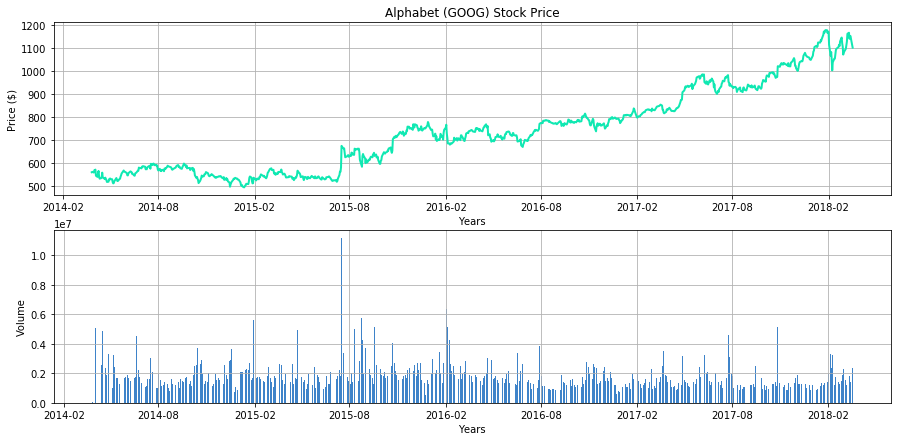

In [40]:
#Configuring the figure size to 15 x 7
fig, ax1 = plt.subplots(figsize=(15,7))
#Creating space to plot in the in the Sub Grid to accomadate the other plot
ax1 = plt.subplot(2,1,1)
ax1.grid(True) #Enabling Grid in the plot
plt.xlabel('Years') #Naming the X-Axis
plt.ylabel('Price ($)') #Naming the Y-Axis
plt.title('Alphabet (GOOG) Stock Price') #Naming the Title
ax1.plot(selected_data.date.values,selected_data.adj_close.values,'#10e8b2',linewidth=2) #Plotting adj_close against dates and giving the desired color
ax2 = plt.subplot(2,1,2)
ax2.bar(selected_data.date.values,selected_data.volume.values,color='#3e83c9')
ax2.grid(True)
plt.xlabel('Years') #Naming the X-Axis for plot2
plt.ylabel('Volume') #Naming the Y-Axis for plot2
plt.show()

- Two Graphs are displayed above, the first shows the **Overall Trend of the Stock Prices of Alphabet** (using Adjusted Closing Prices) during the time period, and the second shows the Volume of stocks traded for the past 5 years.
- On seeing the Graphs, it can be inferred that there was a **steep rise** in stock prices during August 2015 and since then there was a **steady increase overall**. On the contrary, we can see that there was a rise in the volume of stocks traded from August 2015 to February 2016, but after that, the **trading decreased** in the year 2017.

<hr>
#### Relative Strength Index

> - It is a **momentum oscillator** that estimates the speed and change of price movements.
> - The RSI oscillates between zero and 100. 
> - When RSI goes *above* the 70 mark, it is considered **overbought** and **oversold** when it is *below* 30.
> - *#Reference for calculation http://www.iexplain.org/rsi-how-to-calculate-it/*

In [27]:
#Extracting the Adjusted Close Data to Calculate RSI (Relative Strength Index)
rsi_close = selected_data['adj_close']
#Calculate the differences in price from previous value
delta = rsi_close.diff()
#Getting rid of 1st Value as it will be NaN
delta = delta[1:]
# Making the positive gains (up) and negative gains (down) Series
upval, downval = delta.copy(), delta.copy()
upval[upval < 0] = 0
downval[downval > 0] = 0
# Calculate the SMA (Simple Moving Average)
roll_upval = Series.rolling(upval, window=14).mean() #Default time frame for comparing up period and down periods is 14
roll_downval = Series.rolling(downval.abs(), window=14).mean()
# Calculate the RSI based on SMA
RS_SMA = roll_upval / roll_downval
RSI_SMA = 100.0 - (100.0 / (1.0 + RS_SMA))
# Calculate the EWMA
roll_upval1 = Series.ewm(upval, 14).mean()
roll_downval1 = Series.ewm(downval.abs(), 14).mean()
# Calculate the RSI based on EMA (Exponential Moving Average)
RS_EMA = roll_upval1 / roll_downval1
RSI_EMA = 100.0 - (100.0 / (1.0 + RS_EMA))

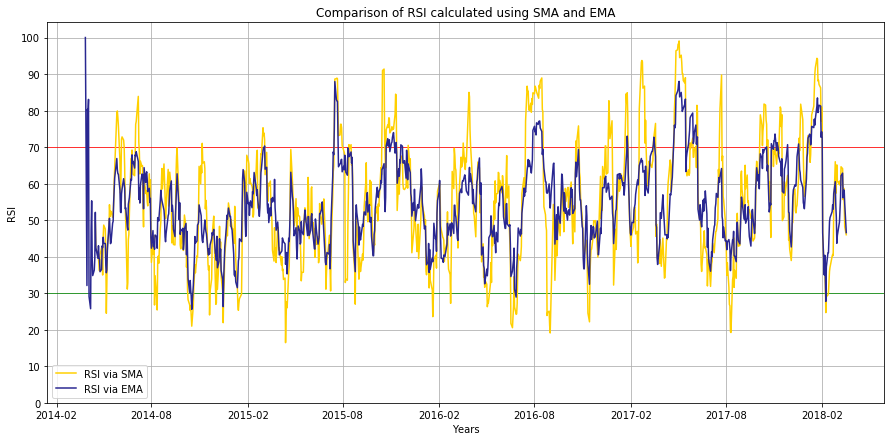

In [46]:
# Compare both results graphically
xdates = selected_data.loc[1:,('date')] #Selecting dates leaving out the 1st record as the corresponding RSI value is NaN
fig,ax = plt.subplots(figsize=(15,7))
ax.plot(xdates,RSI_SMA,color='#ffd000') #Plotting RSI calculated using SMA
ax.plot(xdates,RSI_EMA,color='#292791') #Plotting RSI calculated using EMA
plt.legend(['RSI via SMA', 'RSI via EMA']) #Giving the legends names
plt.xlabel('Years') #Setting Label for X-Axis
plt.ylabel('RSI') #Setting Label for Y-Axis
plt.title('Comparison of RSI calculated using SMA and EMA')
plt.yticks(range(0,110,10)) #Setting the Y-Axis Ticks
xline = ax.get_ygridlines() #Getting the values of the gridlines for Y-Axis
x70 = xline[7].set_color('r') #Setting the GridLine Color Red for value 70
x30 = xline[3].set_color('g') #Setting the GridLine Color Green for value 30
plt.grid(True)
plt.show()

- The plot above shows the difference between the Relative Strength Index calculated using Simple Moving Average(SMA) and Exponential Moving Average(EMA)
- The graph above the red line shows the stocks that are **overbought**, and for the case above we see that a significant amount of stocks are overbought for both the methods of calculation.
- The lines below the green marker line displays the the stocks that are **oversold**, and for the case above we see that a significant amount of stocks are oversold for the one calculated usind SMA.

<hr>
#### Candlestick Plot
> - Candlestick charts are a scientific tool that packs data for **multiple time frames** into individual price bars..
> - Candlesticks create patterns that **predict price direction** once completed.
> - To generate a candlestick graph, the data set should contain open, high, low and close values **for each period** you want to display.


In [29]:
#Creating a function to plot the CandleStick Graph using the data provided.
#To plot a candlestick chart we need 5 stock market data, opening price, high, low, closing price, and the date of transaction
def candlestick_plot(plotting_data):
    #Extracting the data required as a numpy array ensuring the type to be in Floating point.
    cndl_open = np.array(plotting_data[['open']],dtype=np.float64) 
    cndl_high = np.array(plotting_data[['high']],dtype=np.float64)
    cndl_low = np.array(plotting_data[['low']],dtype=np.float64)
    cndl_close = np.array(plotting_data[['close']],dtype=np.float64)
    cndl_dates = []
    #As date cannot be converted in to an array using Numpy directly, we use the date2num function of the dates package of matplotlib
    #We need the dates in floating point as well because candlestick_ohlc accepts dates as numbers
    for date in plotting_data.date[1:]:
        new_date = dates.date2num(date)
        cndl_dates.append(new_date)
    cndl_ohlc = []
    #Creating a list of tuples that can be used to pass the candlestick_ohlc function
    #The tuples include the dates,open,high,low,and close value of stock in the same order 
    for iterator in range(len(cndl_dates)):
        record_of_a_day = cndl_dates[iterator], cndl_open[iterator], cndl_high[iterator], cndl_low[iterator], cndl_close[iterator]
        cndl_ohlc.append(record_of_a_day)
    #Setting the dates format to use conveniently in Y-Axis
    set_day_format = dates.DateFormatter('%d-%b-%Y')
    fig, ax1 = plt.subplots(figsize=(15,7))
    #This function accepts the subplots axes, and the list of tuples created to plot a candlestick graph
    #This function is imported from the finance module of matplotlib
    candlestick_ohlc(ax1, cndl_ohlc, width=0.5, colorup='#079e0a',colordown='r',alpha=0.7)
    ax1.xaxis.set_major_formatter(set_day_format)
    plt.xticks(rotation=30)
    plt.grid()
    plt.xlabel('Dates')
    plt.ylabel('Stock Values (US$)')
    plt.title('Alphabet CandleStick Graph')
    plt.show()

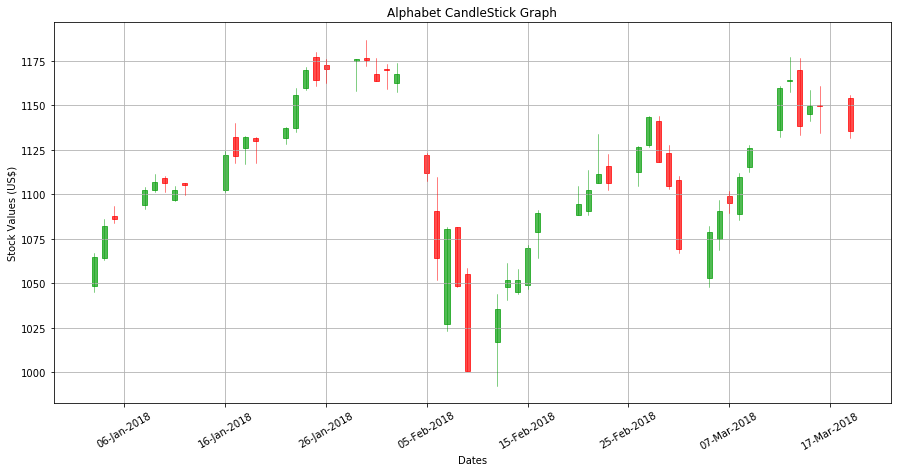

In [30]:
#As the candlestick plot is cluttered for a huge amount of data (long peroid of time)
#We are extracting a small data for the recent 3 months from Jan-2018
small_data = selected_data[(selected_data['date']>='2018-01-01')]
#Plotting Graph for the data extracted in above line
candlestick_plot(small_data)

- The filled part of the candlestick is termed **“the body”**. The long thin lines above and below the body represent the **high/low** range and are called **“shadows”**. The top of the upper shadow is noted as the **high**, and bottom of the lower shadow is indicated by the **low**. 
- The **green** coloured candlestick in the above plot represents that the **stock closes higher than its opening price**, here the top of the body represents the opening price and the bottom of the body denotes the closing price.
- The **red** coloured candlestick in the above plot represents that the **stock closes lower than its opening price**, here the bottom of the body represents the opening price and the top of the body denotes the closing price.
- More stretched body of a candlestick denotes, more intense buying or selling pressure . Conversely, short candlesticks indicate little price movement and represent consolidation.
- We can see in the above plot that there are **fewer red candlesticks** compared to green, this implies that overall the stock prices increased but as there is **less number of green long candlesticks**, it means that there was little price movements.

### Final Manipulation, Exploration and Visualisation

#### Moving Average Convergence Divergence (MACD)
> - Calculating **moving average convergence divergence** using the **closing values** of the stocks
> - Moving Average Convergence Divergence is a trend-following, momentum oscillator that identifies new trends in price movement and confirms whether they are bullish or bearish..
> -  The MACD is computed by subtracting the **26-day EMA** from the **12-day EMA**. A nine-day EMA of the MACD called the **"signal line"**, is then sketched on top of the MACD, working as a trigger for the buy and sell signals.

In [31]:
#Create a function to calculate the MACD Value using the ewm(window) method to calculate mean.
#First we calculate the mean the Exponential Moving Average for a window of 26 days
#Next we compute the mean the Exponential Moving Average for a window of 12 days
def calc_macd(time_series,slow_period=26,fast_period=12):
    emaslow = time_series.ewm(span=slow_period,adjust=False).mean()
    emafast = time_series.ewm(span=fast_period,adjust=False).mean()
    return emafast,emaslow,emafast-emaslow
#MACD is the difference of the two means calculate above
slow_period = 26
fast_period = 12
signal_period = 9
xaxis_years = selected_data.set_index('date') #Making the dates column the index to plot the histogram
#Passing the values in the calc_macd() function and assigning the values to compute signal line
emaslow, emafast, macd_line = calc_macd(selected_data['close'],slow_period,fast_period)
#A nine-day EMA of the MACD, called the "signal line", is then plotted on top of the MACD, \n
#functioning as a trigger for buy and sell signals.
signal_line = macd_line.ewm(span=signal_period,adjust=False).mean()
value = macd_line - signal_line #To plot histogram

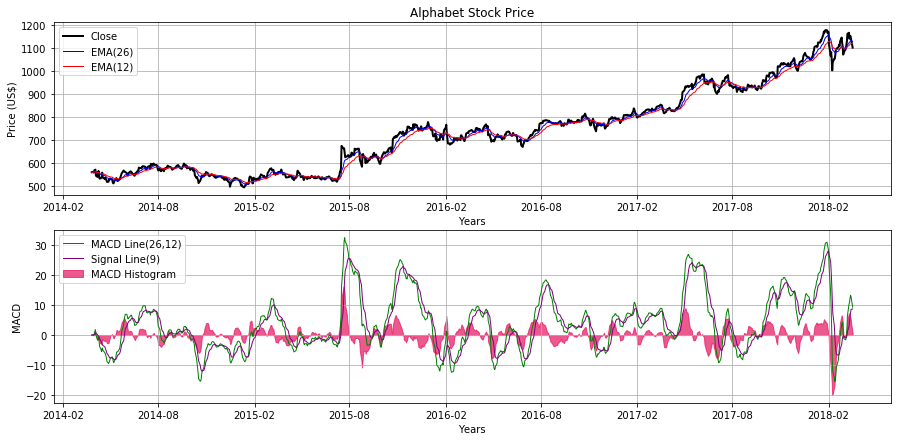

In [41]:
#Creating the subplots and fixing the size of the plot
fig,ax = plt.subplots(figsize=(15,7))
ax = plt.subplot(2,1,1)
ax.grid(True) #Displaying the grid in the graph
ax.plot(selected_data['date'],selected_data['close'],color='black',lw=2,label='Close')
ax.plot(selected_data['date'],emaslow,color='blue',lw=1,label='EMA(26)')
ax.plot(selected_data['date'],emafast,color='red',lw=1,label='EMA(12)')
#Setting the title and labels of X any Y axes
ax.set(title='Alphabet Stock Price', xlabel='Years', ylabel='Price (US$)')
ax.legend(loc=2) #Setting the location of the Legend
ax1 = plt.subplot(2,1,2)
ax1.grid(True) #Displaying the grid in the graph
ax1.plot(selected_data['date'],macd_line,color='green',lw=1,label='MACD Line(26,12)')
ax1.plot(selected_data['date'],signal_line,color='purple',lw=1,label='Signal Line(9)')
#Plotting the MACD histogram 
ax1.fill_between(xaxis_years.index,value,color='#e5125f',alpha=0.7, label='MACD Histogram')
ax1.set(xlabel='Years', ylabel='MACD') #Setting the labels of X any Y axes
ax1.legend(loc=2) #Setting the location of the Legend
plt.show()

- The 12-day and 26-day EMAs are the **most popular short-term means** that are utilised to construct indicators like the moving average convergence divergence (MACD)
- EMAs are used in association with other indicators to *confirm significant market moves and to estimate their validity*. For traders who trade **intraday (within a day)** and fast-moving markets, the EMA is more applicable.
- We use EMA instead of SMA(Simple Moving Average) as EMA gives more importance to recent prices.
- The EMA(26) line in the first plot give us a clear idea that the stock is in the **upper trend**. When the stock prices crosses an EMA line, this is a sign of price trend reversal. 
- As shown in the 2nd plot above, when the MACD line falls below the signal line, it is called a **bearish signal**, which symbolises that it may be the *correct time to sell*. Alternately, when the MACD line rises above the signal line, this indicates a **bullish signal**, it implies that the price of the asset is *expected to experience upward momentum*.


### Tentative Conclusion
> - By plotting the **Stock Market Indicators, Relative Strength Index(RSI), Candlestick Plot,** and **Moving Average Convergence Divergence** it can be concluded that the stock prices of **Alphabet**  has seen a notable rise since **August 2015** and is following an **upper trend** since.
> - We also can't neglect the fact that the prices are increasing but the volume of stocks traded has **seen a fall** in the year 2017, and the price movements were are also very little in 2018.


### Further Analysis
> - Using the above indicators with a **machine learning** algorithm (Generally, **Support Vector Machines**) the future prices of the stock can be predicted(using the **SciKit-Learn Package** in python). 
> - The accuracy might not be significantly high, but it could still give an acceptable result.